## 4주차 미션 - Pandas 라이브러리

### 📌Q1. 먼저 Pandas에서 지원하는 Series에 대해서 한 번 다뤄보겠습니다. 아래와 같이 인덱스와 데이터가 주어졌을 때 Pandas의 Series 형태로 만들어보세요.
- 주어진 데이터에서 10 이상 20 이하의 데이터만 출력하는 Series를 재정의 해보세요.

```python
import pandas as pd

id = ["HDD", "SSD", "USB", "CLOUD"]
data = [19, 11, 5, 97]

# 위 데이터로 Series를 구현해보세요.
series = #

# 10 이상 20 이하를 가지는 데이터만 이용해 다시 Series를 정의하세요.
series = #

print(series)
```

```bash
# 출력 예시
>> HDD 19
   SSD 11
   dtype: int64
```

### 📝A1.

In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

# list type으로 정의된 데이터
id = ["HDD", "SSD", "USB", "CLOUD"]
data = [19, 11, 5, 97]

# Series(data=데이터, index=인덱스명, dtype=데이터타입, name=이름)를 활용하여 구현
series = Series(data=data, index=id, dtype=np.int64, name='data_storage')

# 10 이상 20 이하를 가지는 데이터만 출력하도록 Series selection
series = series[series>=10][series<=20]

print(series)

HDD    19
SSD    11
Name: data_storage, dtype: int64


### 📌Q2. 두번째로 Pandas에서 지원하는 Dataframe을 다뤄보도록 하겠습니다. 다음과 같이 과일과 야채 각각 정리된 데이터가 있습니다. 이 두 데이터를 따로 보기엔 효율성이 떨어지니, 각 표에 정리된 데이터를 각각 하나의 데이터 프레임으로 생성한 후 다음 세부 구현을 진행해보세요.

|Name|Type|Price|
|:---:|:---:|:---:|
|cherry|Fruit|100|
|mango|Fruit|110|
|potato|Vegetable|60|
|onion|Vegetable|80|

<br>

|Name|Type|Price|
|:---:|:---:|:---:|
|pepper|Vegetable|50|
|carrot|Vegetable|70|
|banana|Fruit|90|
|kiwi|Fruit|120|

<br>
  
- 두 데이터를 하나의 데이터로 결합해보세요.
- 결합한 데이터의 type을 이용해 데이터를 정렬해보세요.
- 최종적으로 과일과 야채 중 가장 비싼 가격의 합을 출력해보세요.

```python
import pandas as pd

df1 = # Dataframe 1 columns = ["Name", "Type", "Price"]
df2 = # Dataframe 2 columns = ["Name", "Type", "Price"]

# df1, df2를 columns를 이용해 결합
df3 = # TODO

# Fruit와 Vegetable의 type에 따라 정렬하고, 가격을 내림차순으로 정리
df_fruit = # TODO
df_veg = # TODO

# Fruit와 Vegetable 상위 2개의 가격의 합을 출력
print("Sum of Top 2 Fruit Price : ", #TODO)
print("Sum of Top 2 Vegetable Price : ", #TODO)
```

```bash
# 출력 예시
>> Sum of Top 2 Fruit Price : 230
   Sum of Top 2 Vegetable Price : 150
```

### 📝A2.

In [ ]:
import pandas as pd

# Raw data 선언
raw_data1 = {
    'Name': ['cherry', 'mango', 'potato', 'onion'],
    'Type': ['Fruit', 'Fruit', 'Vegetable', 'Vegetable'],
    'Price': [100, 110, 60, 80]
}
raw_data2 = {
    'Name': ['pepper', 'carrot', 'banana', 'kiwi'],
    'Type': ['Vegetable', 'Vegetable', 'Fruit', 'Fruit'],
    'Price': [50, 70, 90, 120]
}

# DataFrame 생성 
# 주어진 column 명대로 입력
df1 = pd.DataFrame(raw_data1, columns = ['Name', 'Type', 'Price']) 
df2 = pd.DataFrame(raw_data2, columns = ['Name', 'Type', 'Price']) 

# df1, df2를 columns를 이용해 결합
# concat 함수 사용 및 ignore_index 설정을 통해 index 무시
df3 = pd.concat([df1, df2], ignore_index=True)

# Fruit와 Vegetable의 type에 따라 정렬하고, 가격을 내림차순으로 정리
# 각 값에 따라 indexing 조건을 생성하고, sort_values 함수를 사용하여 내림차순으로 정리
df_fruit = df3[df3['Type'] == 'Fruit'].sort_values(['Price'], ascending=False)
df_veg = df3[df3['Type'] == 'Vegetable'].sort_values(['Price'], ascending=False)

# Fruit와 Vegetable 상위 2개의 가격의 합을 출력
# 각 DataFrame의 가격으로 indexing 후, head(2)로 상위 2개를 선택하고, 
# values 속성을 사용하여, 값을 list 형태로 반환 후 합 계산
print("Sum of Top 2 Fruit Price : ", sum(df_fruit['Price'].head(2).values))
print("Sum of Top 2 Vegetable Price : ", sum(df_veg['Price'].head(2).values))

Sum of Top 2 Fruit Price :  230
Sum of Top 2 Vegetable Price :  150


### 📌Q3. 총 5명이 게임을 진행했습니다. 총 5개 라운드를 진행했고, 각각 참가자당 5개의 점수를 받았습니다. 주어진 데이터를 dataframe의 형태로 만든 후 각 세부 구현을 진행해보세요.
- 참여자의 이름을 index로 해서, 각 라운드의 columns를 추가해 데이터를 정리해보세요.
- 6번째 라운드의 점수가 아래와 같을 때, 이를 추가해보세요.
- 각 데이터의 mean, max, min 값을 출력해보세요.

```python
import pandas as pd

idx = ["Sue", "Ryan", "Jay", "Jane", "Anna"]
col = ["round_1", "round_2", "round_3", "round_4", "round_5"]
data = [[55, 64, 60, 66, 57],
        [64, 77, 71, 79, 67],
        [88, 81, 79, 89, 77],
        [45, 35, 30, 46, 47],
        [91, 96, 90, 97, 99]]

# 위 데이터를 이용해 dataframe을 구성해보세요.
df = #TODO

# df에 새로운 column인 round_6의 데이터 [11, 15, 13, 17, 19]를 추가해보세요.
col_round_6 = #TODO

# 각 데이터의 mean, max, min 값을 출력해보세요.
print(#TODO)
```

```bash
# 출력예시
>>>       round_1  round_2  round_3  round_4  round_5  round_6
Sue        55       65       60       66       57       11
Ryan       64       77       71       79       67       15
Jay        88       81       79       89       77       13
Jane       45       35       30       46       47       17
Anna       91       96       90       97       99       19
      round_1  round_2  round_3  round_4  round_5  round_6
mean     68.6     70.8     66.0     75.4     69.4     15.0
min      45.0     35.0     30.0     46.0     47.0     11.0
max      91.0     96.0     90.0     97.0     99.0     19.0
```

### 📝A3.

In [ ]:
import pandas as pd

# 문제에서 주어진 Raw data
idx = ["Sue", "Ryan", "Jay", "Jane", "Anna"]
col = ["round_1", "round_2", "round_3", "round_4", "round_5"]
data = [[55, 65, 60, 66, 57],
        [64, 77, 71, 79, 67],
        [88, 81, 79, 89, 77],
        [45, 35, 30, 46, 47],
        [91, 96, 90, 97, 99]]

# 위 데이터를 이용해 dataframe을 구성해보세요.
# zip + unpacking을 이용하여 list 형태의 data로 DataFrame 생성
df = pd.DataFrame(list(zip(*data)), index=col, columns = idx)
# index, column을 서로 switch
df = df.T
# df에 새로운 column인 round_6의 데이터 [11, 15, 13, 17, 19]를 추가해보세요.
# DataFrame의 index에 새로운 column 이름을 넣어 새로운 column 생성
col_round_6 = [11, 15, 13, 17, 19]
df['round_6'] = col_round_6

# 각 데이터의 mean, max, min 값을 출력해보세요.
print(df)
# describe를 담고 있는 DataFrame을 만들고, loc를 사용하여 indexing
df_desc = df.describe(include=[np.number])
print(df_desc.loc[['mean', 'min', 'max']])

      round_1  round_2  round_3  round_4  round_5  round_6
Sue        55       65       60       66       57       11
Ryan       64       77       71       79       67       15
Jay        88       81       79       89       77       13
Jane       45       35       30       46       47       17
Anna       91       96       90       97       99       19
      round_1  round_2  round_3  round_4  round_5  round_6
mean     68.6     70.8     66.0     75.4     69.4     15.0
min      45.0     35.0     30.0     46.0     47.0     11.0
max      91.0     96.0     90.0     97.0     99.0     19.0


### 📌Q4. 이번 미션부터는 Matplotlib을 이용해 간단히 그래프를 출력해보도록 하겠습니다. 다음과 같은 데이터 t가 주어져있을 때, 출력 예시로 제안된 그래프를 출력해보세요.

- plot 함수 내 각 마커의 색상과 모양을 표현하는 방법을 확인해보세요.

```python
import numpy as np
import matplotlib.pyplot as plt

t = np.arrange(0., 5., 0.2)

# 사용 마커는 다음과 같습니다. red dashes, blue squares, green triangles
plt.plot(#TODO)
plt.show()
```


- 출력 예시

![Q4](./img/Q4.png)

### 📝A4.

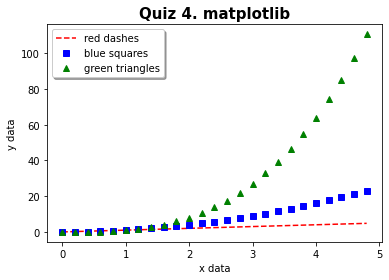

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 0.2 단위로 0부터 5까지의 수 생성
t = np.arange(0., 5., 0.2)

# y=x, y=x^2, y=x^3 의 그래프가 되도록 y좌표 생성
rd = [np.power(value, 1) for value in t]
bs = [np.power(value, 2) for value in t]
gt = [np.power(value, 3) for value in t]

# 사용 마커 - red dashes, blue squares, green triangles
# linestyle, label, marker 입력
plt.plot(t, rd, c="r", linestyle="dashed", label='red dashes')
plt.plot(t, bs, c="b", marker="s", linestyle="none", label='blue squares')
plt.plot(t, gt, c="g", marker="^", linestyle="none", label='green triangles')

# 범례 추가
plt.legend(shadow=True, fancybox=True, loc="upper left")
# 제목 추가
plt.title('Quiz 4. matplotlib', weight='bold', fontsize=15)
# x, y 축 추가
plt.xlabel('x data')
plt.ylabel('y data')
# plot 출력
plt.show()

### 📌Q5. Matplotlib을 이용해서 아래와 같은 데이터가 주어졌을때, 출력 예시와 같은 형태로 그래프를 출력해보세요.

- 각 그룹별 데이터를 다른 형식의 그래프로 생성해보세요. 각각 막대, 점, 선 그래프입니다.

```python
import matplotlib.pyplot as plt

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.# 구현파트
plt.show()
```

- 출력 예시  
![Q5](./img/Q5.png)

### 📝A5.

#### Matplotlib 사용

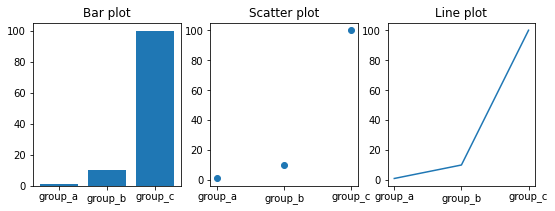

In [ ]:
import matplotlib.pyplot as plt

# 각 그룹 이름을 list로 지정
names = ['group_a', 'group_b', 'group_c']
# 각 그룹별 데이터를 list로 지정
values = [1, 10, 100]

# figure 선언
plt.figure(figsize=(9, 3))

# subplot 1(row) 3(col) index
plt.subplot(1, 3, 1)
# bar type
plt.bar(names, values)
plt.title('Bar plot')
plt.subplot(1, 3, 2)
# scatter type
plt.scatter(names, values)
plt.title('Scatter plot')
plt.subplot(1, 3, 3)
# line(default) type
plt.plot(names, values)
plt.title('Line plot')

plt.show()

#### Seaborn 사용

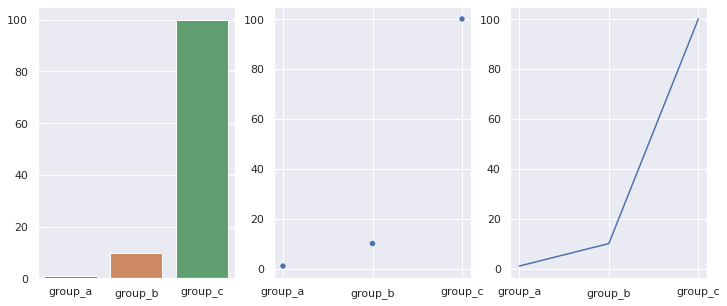

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 그룹 이름을 list로 지정
names = ['group_a', 'group_b', 'group_c']
# 각 그룹별 데이터를 list로 지정
values = [1, 10, 100]
df = pd.DataFrame(data=values, index=names)

# figure 선언
fig, ax = plt.subplots(ncols=3, figsize=(12,5))

# bar type
sns.barplot(x=names, y=values, ax=ax[0])

# scatter type
sns.scatterplot(data=df, ax=ax[1])
# 범례 제거
ax[1].legend_.remove()

# line(default) type
sns.lineplot(data=df, ax=ax[2])
ax[2].legend_.remove()

#subplot 별로 중복되지 않도록, 간격 설정
plt.subplots_adjust(wspace=0.2)
plt.show()
